<a href="https://colab.research.google.com/github/KC-ai/APPM4600/blob/main/NumericsHW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

#Problem 1 (c)

In [8]:
def driver():
# use routines
  f = lambda x: 2*x - 1 - np.sin(x)
  a = 0
  b = 1
  tol = 1e-7
  [astar,ier] = bisection(f,a,b,tol)
  print('the approximate root is',astar)
  print('the error message reads:',ier)
  print('f(astar) =', f(astar))

In [9]:
def bisection(f,a,b,tol):
    # Inputs:
    # f,a,b - function and endpoints of initial interval
    # tol - bisection stops when interval length < tol
    # Returns:
    # astar - approximation of root
    # ier - error message
    #         ier = 1 => fail (f(a) and f(b) have same sign)
    #         ier = 0 => success

    fa = f(a)
    fb = f(b)
    if fa * fb > 0:
        return [a, 1]

    if fa == 0:
        return [a, 0]
    if fb == 0:
        return [b, 0]

    count = 0
    while abs(b - a) > tol:
        d = 0.5*(a + b)
        fd = f(d)

        if fd == 0:
            return [d, 0]


        if fa * fd < 0:
            b = d
            fb = fd
        else:
            a = d
            fa = fd

        count += 1

    astar = 0.5*(a + b)
    ier = 0
    print("Number of iterations=", count)
    return [astar, ier]


In [10]:
driver()

Number of iterations= 24
the approximate root is 0.8878622353076935
the error message reads: 0
f(astar) = 3.24940127027773e-08


# Problem 2

## Problem 2a

In [11]:
def driver2():
# use routines
  f = lambda x:(x-5)**9
  a = 4.82
  b = 5.2
  tol = 1e-4
  [astar,ier] = bisection(f,a,b,tol)
  print('the approximate root is',astar)
  print('the error message reads:',ier)
  print('f(astar) =', f(astar))



driver2()


Number of iterations= 12
the approximate root is 5.00002685546875
the error message reads: 0
f(astar) = 7.265987304979065e-42


## Problem 2b

In [12]:
def driver2b():
# use routines
  f = lambda x: x**9 - 45*x**8 + 900*x**7 - 10500*x**6 + 78750*x**5 - 393750*x**4 + 1312500*x**3 - 2812500*x**2 + 3515625*x - 1953125
  a = 4.82
  b = 5.2
  tol = 1e-4
  [astar,ier] = bisection(f,a,b,tol)
  print('the approximate root is',astar)
  print('the error message reads:',ier)
  print('f(astar) =', f(astar))


driver2b()


the approximate root is 5.12875
the error message reads: 0
f(astar) = 0.0


#Problem 3b

In [13]:
def driver3b():
# use routines
  f = lambda x: x**3 + x - 4
  a = 1
  b = 4
  tol = 1e-3
  [astar,ier] = bisection(f,a,b,tol)
  print('the approximate root is',astar)
  print('the error message reads:',ier)
  print('f(astar) =', f(astar))


driver3b()


Number of iterations= 12
the approximate root is 1.3790283203125
the error message reads: 0
f(astar) = 0.0015528278327110456


# Problem 5




## Problem 5a

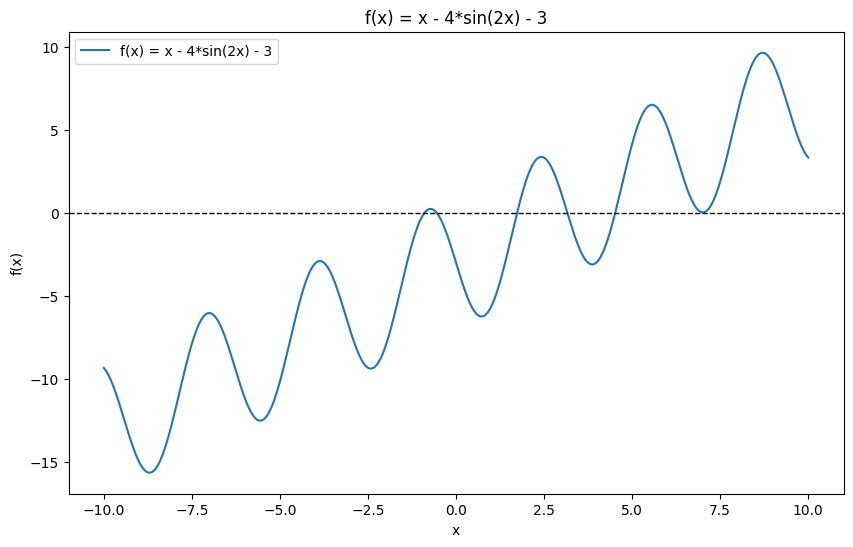

Number of zero crossings: 5


In [14]:

def f(x):
    return x - 4 * np.sin(2 * x) - 3


x_range = np.linspace(-10, 10, 1000)
output = f(x_range)

plt.figure(figsize=(10, 6))
plt.plot(x_range, output, label="f(x) = x - 4*sin(2x) - 3")
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.title("f(x) = x - 4*sin(2x) - 3")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()


numzeroes = 0
for i in range(len(x_range) - 1):
    if output[i] * output[i + 1] < 0:
        numzeroes += 1

print(f"Number of zero crossings: {numzeroes}")


## problem 5b

In [16]:
def fixedpt(f, x0, tol, Nmax):
    """
    Fixed-point iteration method.
    f: Function for iteration
    x0: Initial guess
    tol: Stopping tolerance
    Nmax: Maximum number of iterations
    Returns:
        [xstar, ier]: Approximate fixed point and error flag
    """
    count = 0
    while count < Nmax:
        count += 1
        x1 = f(x0)
        if abs(x1 - x0) < tol:
            return [x1, 0]
        x0 = x1
    return [x0, 1]


def driver():
    """
    Driver function for fixed-point iteration with multiple starting guesses.
    """
    g = lambda x: -np.sin(2 * x) + 5.0 * (x / 4.0) - (3.0 / 4.0)  # Fixed-point function

    Nmax = 100
    tol = 1e-10

    guesses = [0.0, 2.0, 4.0, 6.0]

    for x0 in guesses:
        [xstar, ier] = fixedpt(g, x0, tol, Nmax)
        if ier == 0:
            print(f"Guess x0 = {x0:f} converges to x* = {xstar:.11g}")
        else:
            print(f"Guess x0 = {x0:f} doesn't converge")


if __name__ == "__main__":
    driver()


Guess x0 = 0.000000 converges to x* = -0.54444240071
Guess x0 = 2.000000 converges to x* = 3.1618264866
Guess x0 = 4.000000 converges to x* = 3.1618264865
Guess x0 = 6.000000 doesn't converge
